# Exploratory Data Analysis on a Dataset

## Objective:-
### The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

## 1. Data Cleaning and Preparation:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.a. Loading the dataset into a DataFrame:

In [3]:
df = pd.read_csv("Cardiotocographic.csv")
df.head()  # Displays the first few rows of the dataset

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
# Creating a copy for cleaning:
df_cleaned = df.copy()

In [7]:
# Finding missing values:
df_cleaned.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

### 1.b. Handling missing values:

In [9]:
# We can handle missing values by imputing with (mean, median) or by dropping the rows with missing values, i chose to impute.
df_cleaned.fillna(df_cleaned.mean(),inplace=True)
df_cleaned.isnull().sum()  # checking for null values after imputation

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

### 1.c. Identify and correct any inconsistencies in data types:

In [11]:
df_cleaned.dtypes  # All columns are of type float64, which seems appropriate for numerical data.

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

### 1.d. Detecting outliers by Interquartile Range (IQR) Method:

In [13]:
Q1 = df_cleaned.quantile(0.25) # Calculate Q1 (25th percentile) for each column
Q3 = df_cleaned.quantile(0.75) # Calculate Q3 (75th percentile) for each column
# Calculate the IQR
IQR = Q3 - Q1
# Determine the lower and upper boundaries for outliers:
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
# Identify outliers (those that fall outside the bounds)
outliers = (df_cleaned < lower_bound) | (df_cleaned > upper_bound)
outliers.sum()

LB           10
AC           43
FM          347
UC           13
DL          125
DS          141
DP          305
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         580
dtype: int64

### 1.d. Treating outliers:

In [15]:
# can be done either by Removing rows with outliers or Capping outliers at the boundary values, i chose to cap the outliers as i dont want to lose more data.
df_capped = df_cleaned.clip(lower= lower_bound, upper= upper_bound, axis=1)
df_capped

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.4,64.0,0.999926,1.0
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.1,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006416,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,0.000000,1.0
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,1.000000,1.0
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,1.000000,1.0
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,1.000000,1.0


## 2. Statistical Summary:

### 2.a. Statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range):-

In [17]:
summary = df_capped.describe().transpose()
summary['median'] = df_capped.median()
summary['IQR'] = df_capped.quantile(0.75) - df_capped.quantile(0.25)
summary

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2126.0,133.293725,9.930227,105.000000,126.000000,133.000000,140.000000,161.000000,133.000000,14.000000
AC,2126.0,0.003147,0.003826,-0.008409,0.000000,0.001668,0.005606,0.014015,0.001668,0.005606
FM,2126.0,0.001568,0.002485,-0.003850,0.000000,0.000000,0.002567,0.006416,0.000000,0.002567
UC,2126.0,0.004362,0.003001,-0.005177,0.001851,0.004484,0.006536,0.013564,0.004484,0.004685
DL,2126.0,0.001770,0.002668,-0.004934,0.000000,0.000000,0.003289,0.008224,0.000000,0.003289
DS,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2126.0,46.981873,17.612745,-11.500000,32.000000,49.000000,61.000000,104.500000,49.000000,29.000000
MSTV,2126.0,1.304644,0.781091,-0.800000,0.700000,1.200000,1.700000,3.200000,1.200000,1.000000
ALTV,2126.0,6.691678,10.378400,-16.500000,0.000000,0.000000,11.000000,27.500000,0.000000,11.000000


### 2.b. Findings from this summary:-

In [ ]:
# Wide Range of Values for LB and Width:
# LB (mean = 133.29, max = 161.00, min = 105.00) and Width (mean = 70.32, max = 194.50, min = -57.50) shows variability. 
# Width has a very large range and a high standard deviation (39.57), indicating variability.

# Variables with Low Variation:
# AC, FM, UC, DL, DS, and DP have very low means and standard deviations, with DS and DP having zero variability (std = 0). 

# ASTV and ALTV Show High Variability:
# ASTV (mean = 46.98, std = 17.61) and ALTV (mean = 6.69, std = 10.38) have high standard deviations, which means a wider spread of values.

# NSP is Constant:
# NSP has a mean and median of 1 with a standard deviation of 0, so it is a constant variable.

# Median vs. Mean Discrepancy:
# For some variables, there is a strange difference between the mean and median values. 
# For eg., ASTV has a median of 49, higher than the mean of 46.98, this indicates a right-skewed distribution.

# High Interquartile Range (IQR):
# Width has a large IQR of 63, which shows a broad middle 50% range of values compared to other variables with smaller IQRs.


## 3. Data Visualization:

### 3.a. Create Histograms or boxplots to visualize the distributions of various numerical variables


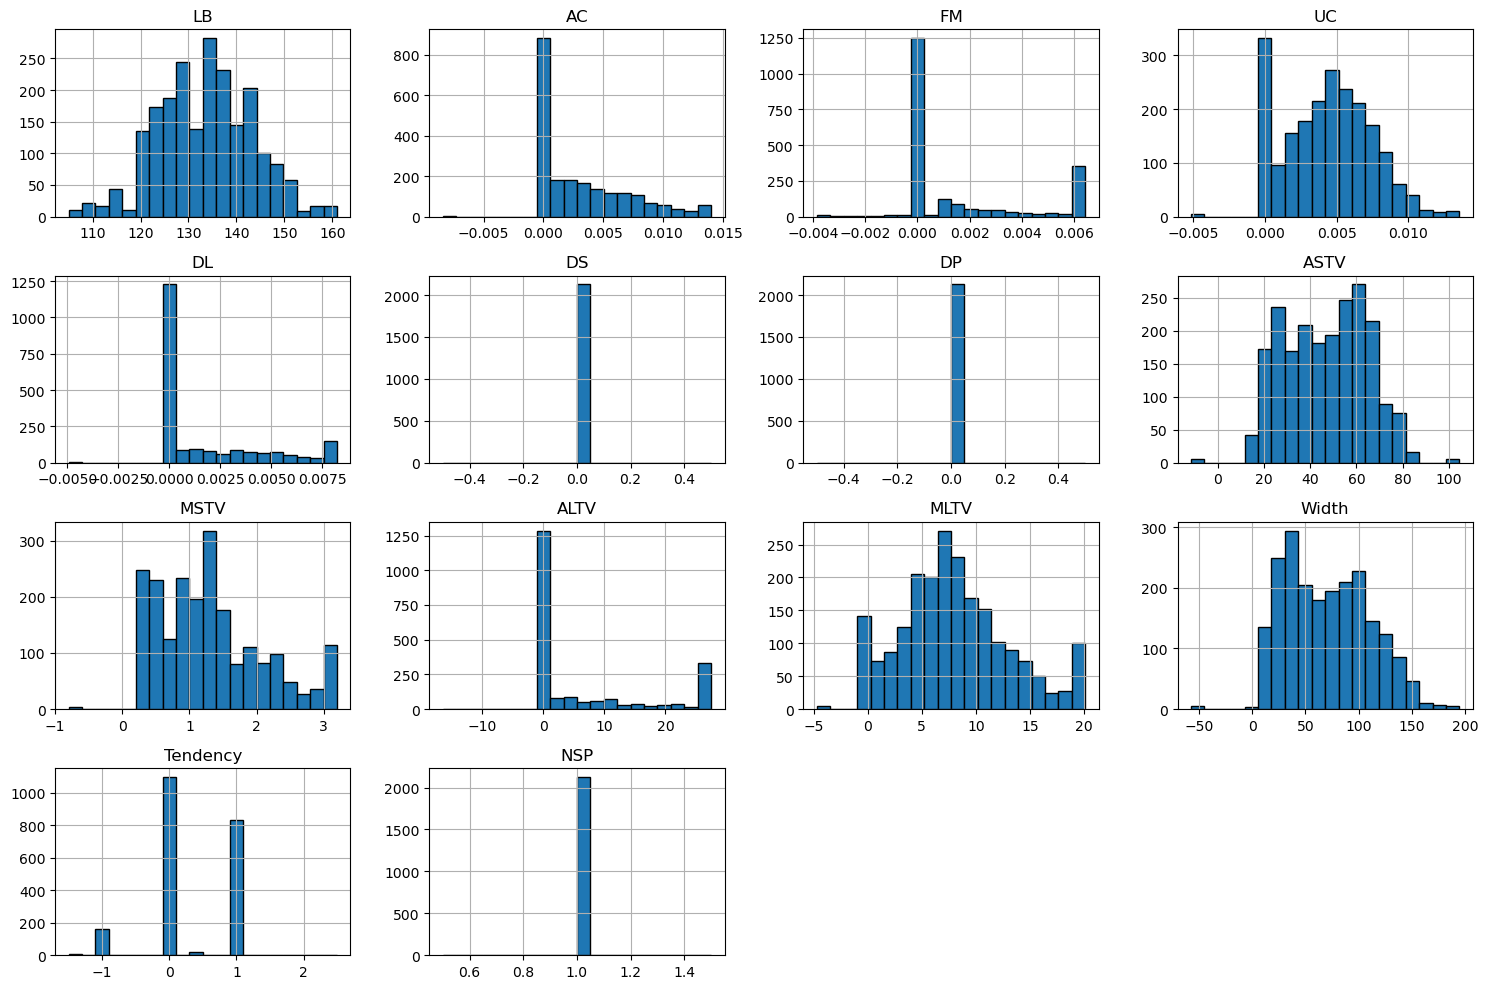

In [19]:
# Histograms
df_capped.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [21]:
df_capped.skew(), df_capped.kurt()

(LB          0.017516
 AC          1.057906
 FM          1.129418
 UC          0.148635
 DL          1.231821
 DS          0.000000
 DP          0.000000
 ASTV       -0.015788
 MSTV        0.763373
 ALTV        1.211892
 MLTV        0.496900
 Width       0.287991
 Tendency   -0.278519
 NSP         0.000000
 dtype: float64,
 LB         -0.168518
 AC          0.406160
 FM         -0.244074
 UC         -0.450476
 DL          0.334492
 DS          0.000000
 DP          0.000000
 ASTV       -0.682698
 MSTV       -0.048381
 ALTV       -0.163739
 MLTV       -0.054834
 Width      -0.580019
 Tendency   -0.348186
 NSP         0.000000
 dtype: float64)

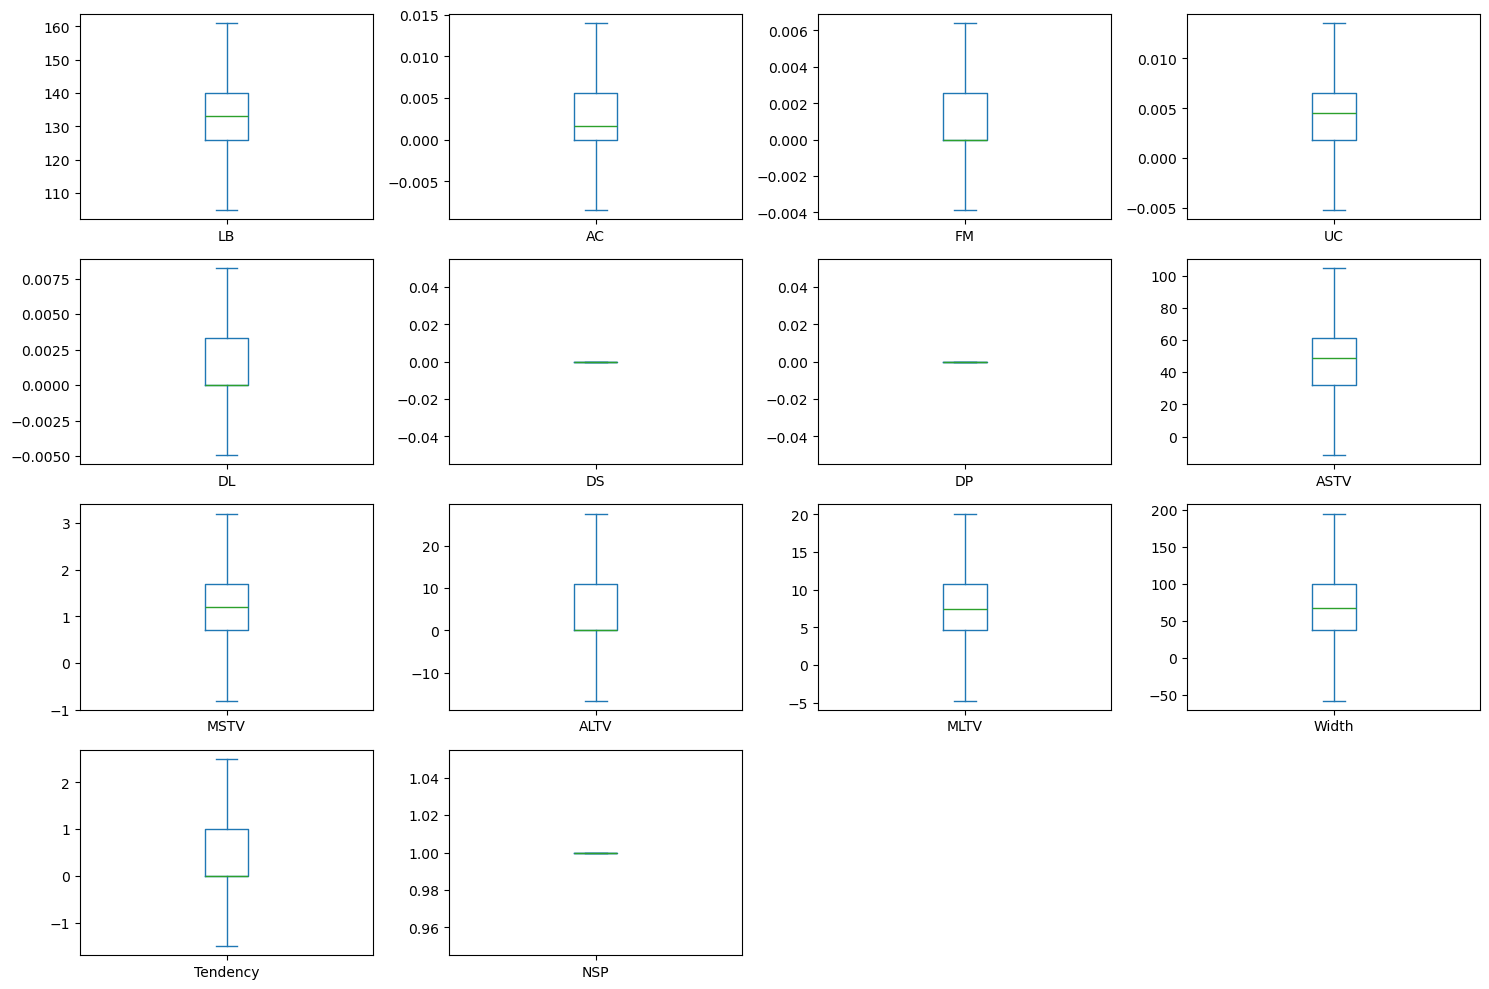

In [23]:
### Boxplots
df_capped.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

### 3.b. Use bar charts or pie charts to display the frequency of categories for categorical variables

In [ ]:
# There's no categorical columns in this dataset, so we can avoid this step

### 3.c. Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

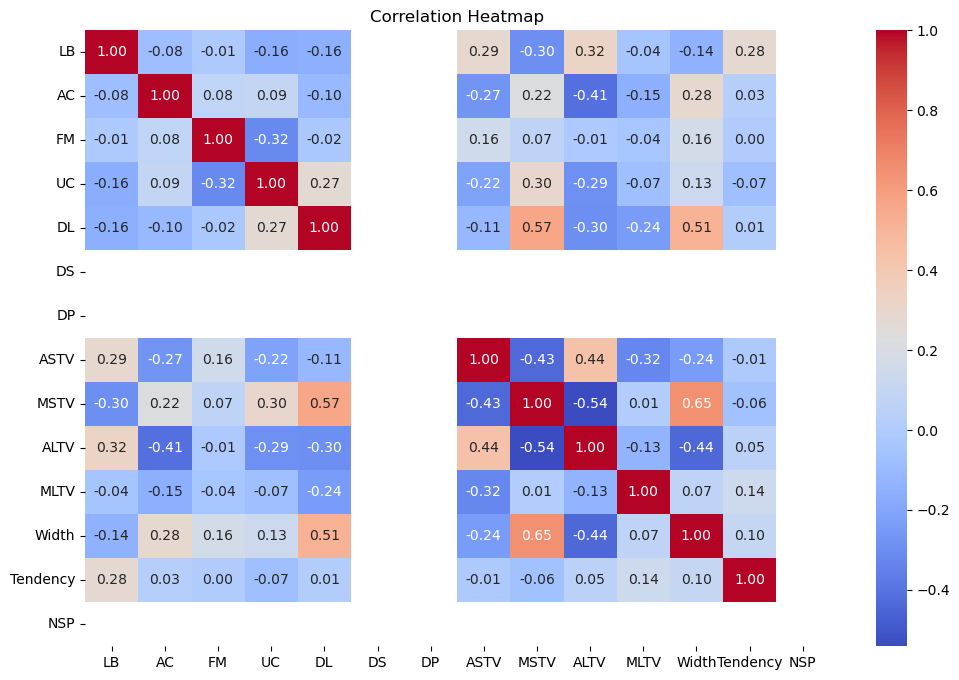

In [25]:
# correlation heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(df_capped.corr(), annot=True, cmap= 'coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 3.d. Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

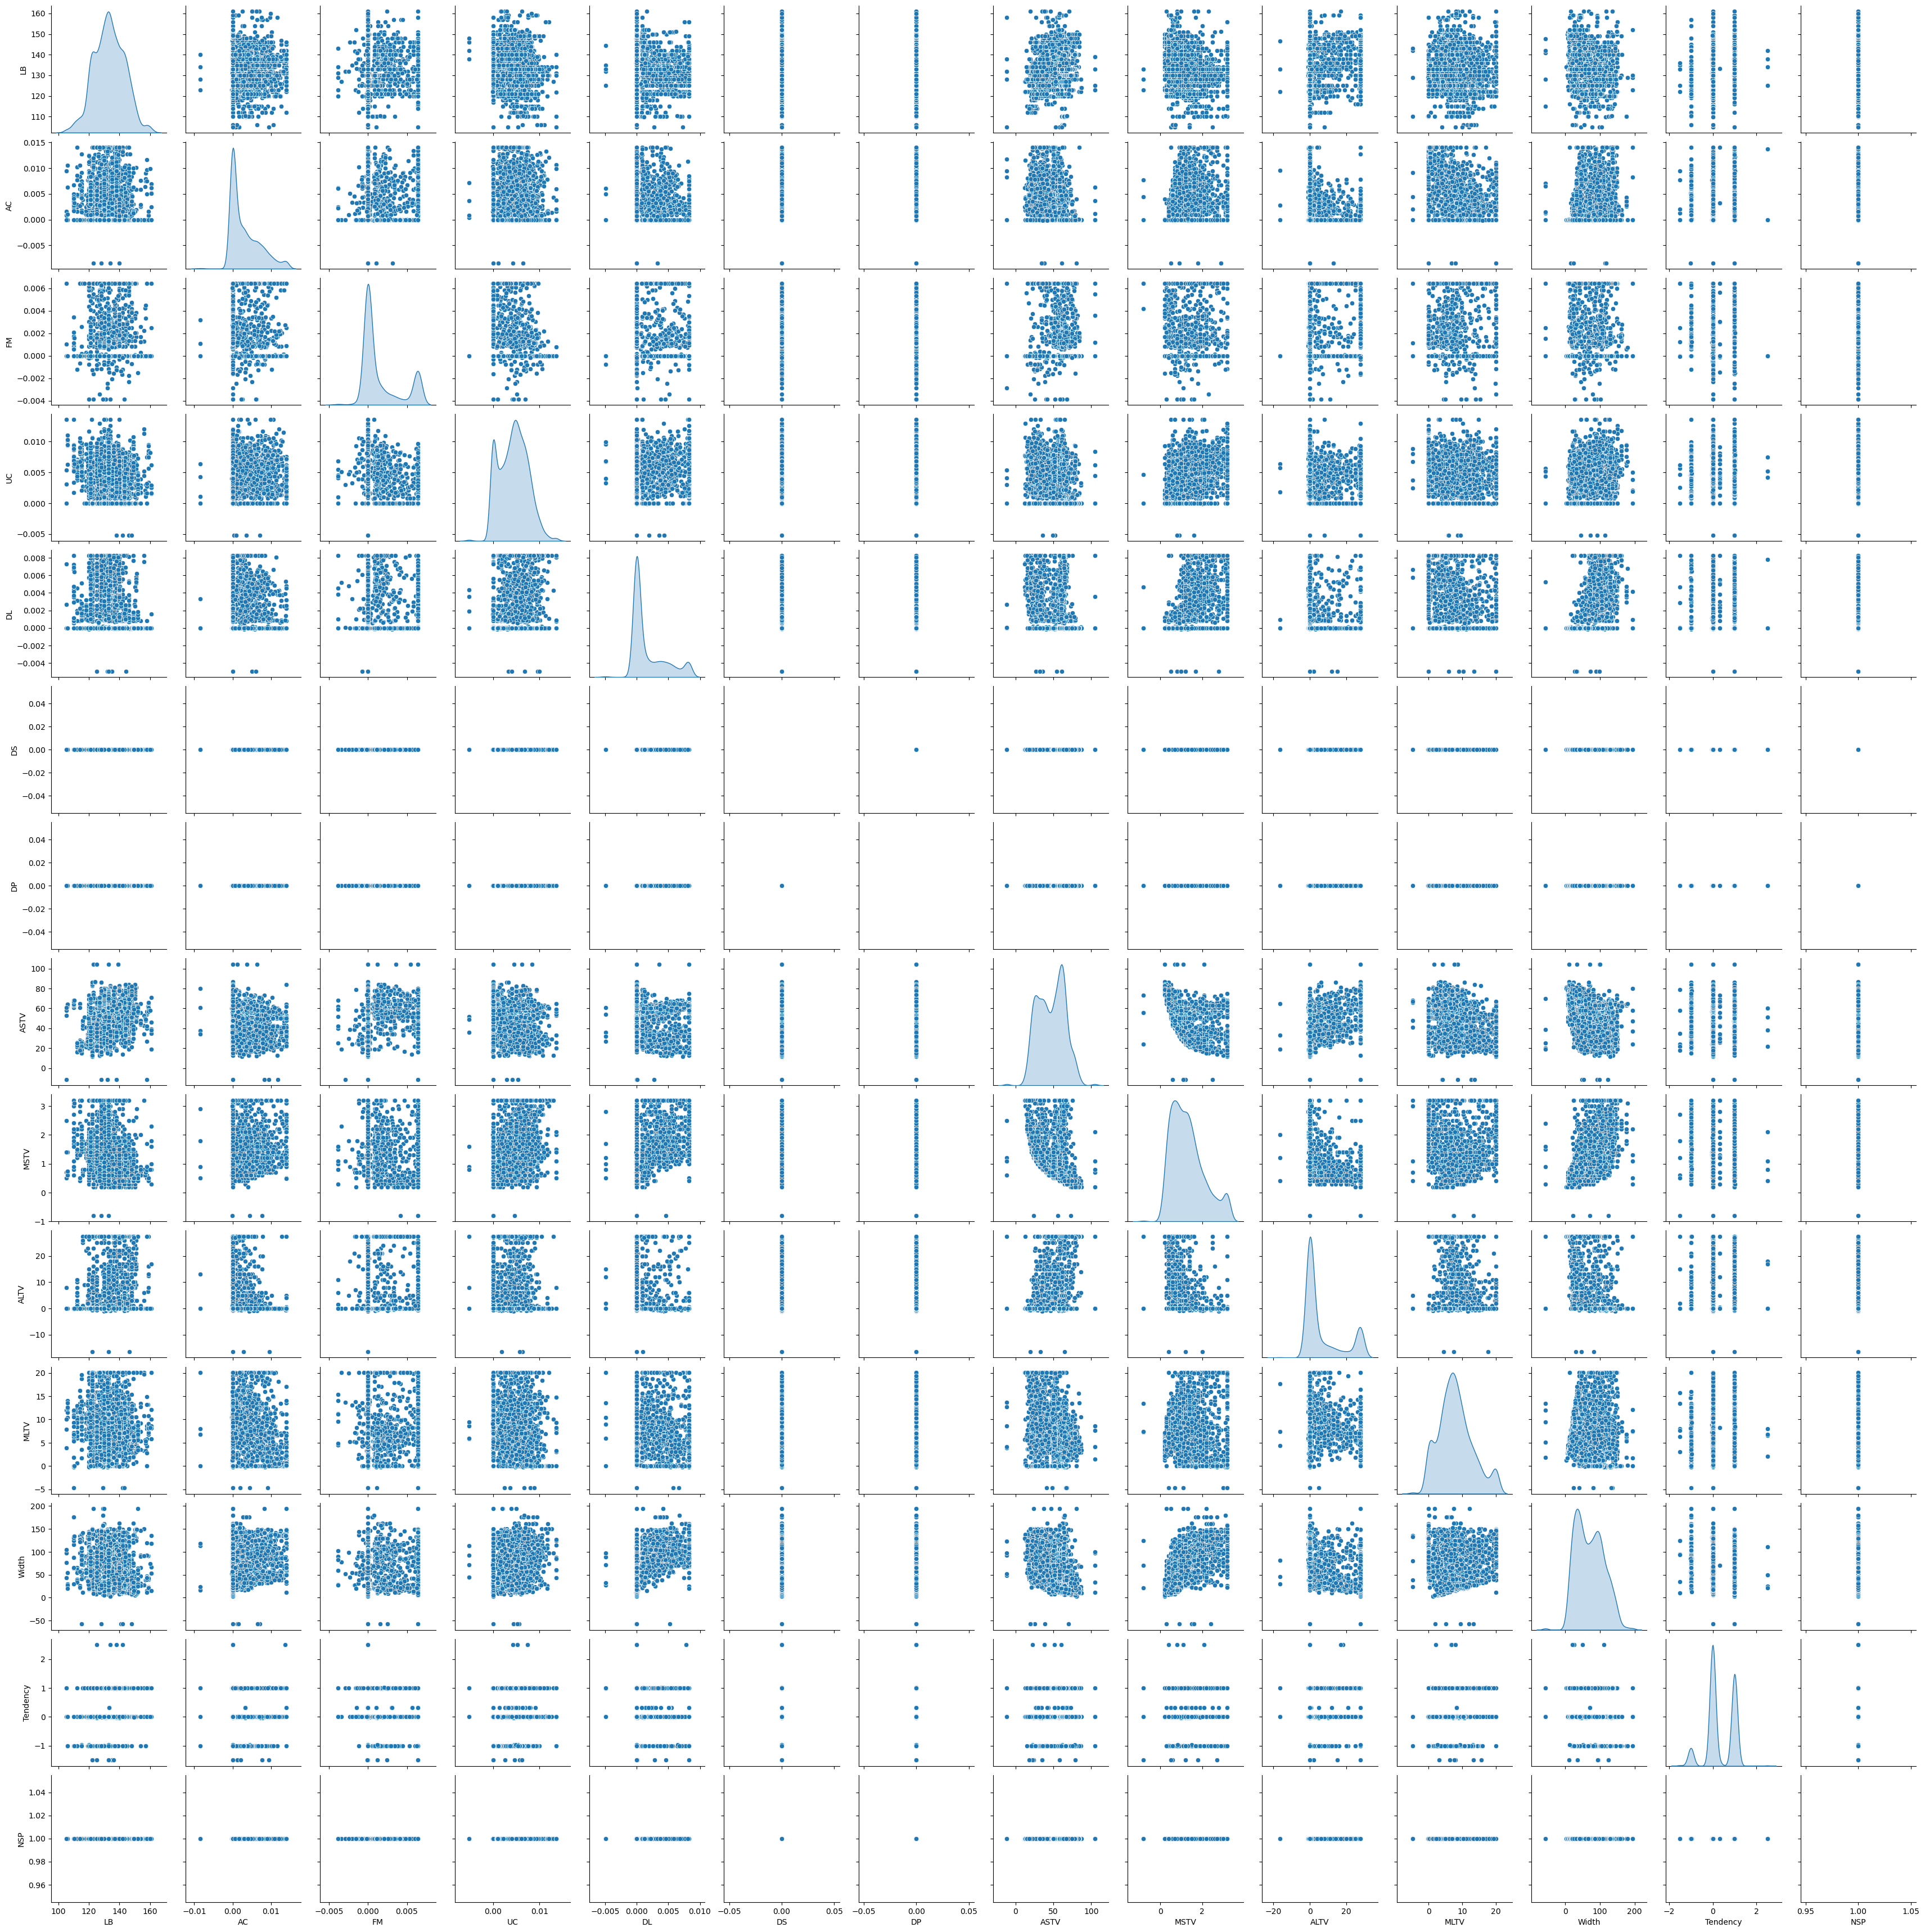

In [27]:
# Pair plot
sns.pairplot(df_capped, diag_kind='kde')
plt.show()

## 4. Pattern Recognition and Insights:

### 4.a. Identify any correlations between variables and discuss their potential implications

In [28]:
correlation_matrix = df_capped.corr()
print(correlation_matrix)

                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000 -0.080880 -0.006904 -0.162773 -0.156224 NaN NaN  0.285623   
AC       -0.080880  1.000000  0.076151  0.093970 -0.102722 NaN NaN -0.272436   
FM       -0.006904  0.076151  1.000000 -0.317265 -0.017610 NaN NaN  0.156351   
UC       -0.162773  0.093970 -0.317265  1.000000  0.268605 NaN NaN -0.215984   
DL       -0.156224 -0.102722 -0.017610  0.268605  1.000000 NaN NaN -0.111624   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.285623 -0.272436  0.156351 -0.215984 -0.111624 NaN NaN  1.000000   
MSTV     -0.295485  0.217447  0.070300  0.297843  0.566340 NaN NaN -0.433844   
ALTV      0.322315 -0.409592 -0.013420 -0.293340 -0.295886 NaN NaN  0.439040   
MLTV     -0.042613 -0.152335 -0.036875 -0.074002 -0.242556 NaN NaN -0.324728   
Width    -0.140044  0.283773  0.164648  

In [ ]:
# Positive Correlations:
# LB and ASTV: Correlation = 0.2856. There is a weak positive correlation, meaning as LB increases, ASTV tends to increase slightly.
# Width and MSTV: Correlation = 0.6461. There is a moderate positive correlation, meaning as Width increases, MSTV tends to increase significantly.

# Negative Correlations:
# AC and ALTV: Correlation = -0.4096. There is a moderate negative correlation, meaning as AC increases, ALTV tends to decrease.
# ASTV and MSTV: Correlation = -0.4338. There is a moderate negative correlation, meaning as ASTV increases, MSTV tends to decrease.
# ALTV and Width: Correlation = -0.4392. There is a moderate negative correlation, meaning as ALTV increases, Width tends to decrease.

# Near-Zero Correlations:
# Variable 'Tendency' has weak correlations with other variables, its relationship with most variables is very weak or negligible.

# Missing Values:
# DS and DP: These variables have NaN values,this proves either they are constant or have only one unique value, leading to no correlations.

## 5. Conclusion:

### 5.a. Summarize the key insights and patterns discovered through your exploratory analysis

In [ ]:
# Missing Values: 
# So many columns had missing values, which were imputed using the mean. 
# This shows that the data has inconsistencies or gaps, which might affect the analysis if it was not properly addressed.

# Outliers: 
# The dataset contains outliers, particularly in columns like LB, AC, DS, DP, and others.
# Outliers were addressed using the capping method, which limits extreme values to a specified range.

# Distribution of Variables:
# After the histograms and pair plots were generated, the dataset includes a variety of numerical variables.
# Some of these might has skewed distributions, showing that certain measures (like median instead of mean) could be more appropriate for describing central tendencies.

# Potential Correlations:
# The presence of multiple variables, such as LB, AC, and NSP, shows that there's correlations between these features.
# This could indicate relationships that could be crucial in predicting the target variable NSP.

### 5.b. Discuss how these findings could impact decision-making or further analyses.

In [ ]:
# Data Distribution: 
# Understanding the distribution of variables gives decisions on the statistical methods to use. 
# For example, skewed data may require transformations or non-parametric methods.

# Correlations: 
# Identifying correlations between variables is useful for feature selection in future predictive modeling. 
# High correlations between independent variables may suggest multicollinearity, which could later affect model performance.

# Modeling and Predictions: 
# The patterns observed shows that this dataset could be used for classification models, particularly predicting the NSP category. 
# Insights from the EDA helps in selection of right features and preparation of data for machine learning models.